### **PHASE 1: Setup & Initial Exploration**

---



In [ ]:
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

In [ ]:
data_path = "/content/kddcup.data_10_percent"
df = pd.read_csv(data_path, names=columns)
df.shape

(228625, 42)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228625 entries, 0 to 228624
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     228625 non-null  int64  
 1   protocol_type                228625 non-null  object 
 2   service                      228625 non-null  object 
 3   flag                         228625 non-null  object 
 4   src_bytes                    228625 non-null  int64  
 5   dst_bytes                    228625 non-null  int64  
 6   land                         228625 non-null  int64  
 7   wrong_fragment               228625 non-null  int64  
 8   urgent                       228625 non-null  int64  
 9   hot                          228625 non-null  int64  
 10  num_failed_logins            228625 non-null  int64  
 11  logged_in                    228625 non-null  int64  
 12  num_compromised              228625 non-null  int64  
 13 

In [ ]:
df['label'].value_counts()

,count
label,
smurf.,109185
normal.,71225
neptune.,41122
back.,2103
satan.,1587
warezclient.,1020
ipsweep.,862
portsweep.,639
teardrop.,397


In [ ]:
df['attack_type'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)
df['attack_type'].value_counts()

,count
attack_type,
1,157400
0,71225


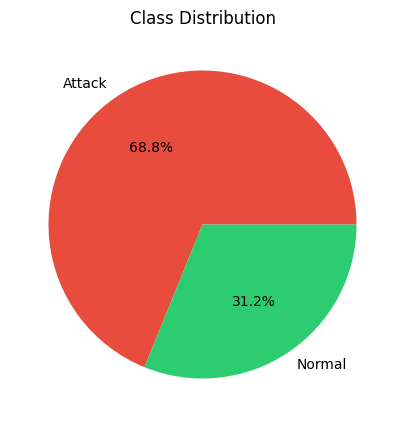

In [ ]:
plt.figure(figsize=(5,5))
df['attack_type'].value_counts().plot.pie(
    labels=['Attack', 'Normal'],
    autopct='%1.1f%%',
    colors=['#e74c3c','#2ecc71']
)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


/tmp/ipython-input-50-291581623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_services.values, y=top_services.index, palette="rocket")


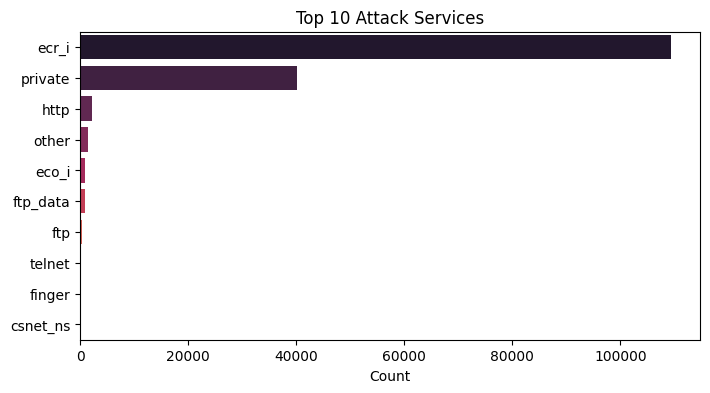

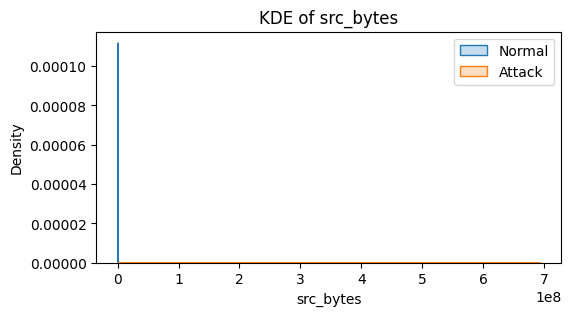

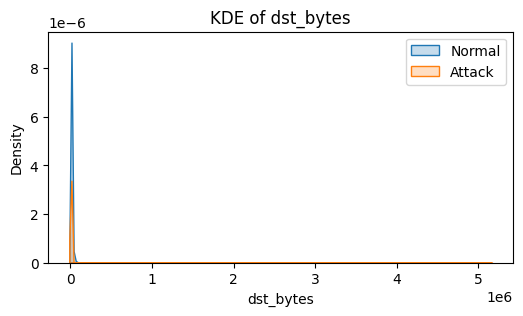

In [ ]:
# ─── Enhanced EDA ────────────────────────────────────────────────────────────────

# 1) Bar plot of top 10 services involved in attacks
top_services = df[df.attack_type==1].service.value_counts().nlargest(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_services.values, y=top_services.index, palette="rocket")
plt.title("Top 10 Attack Services")
plt.xlabel("Count"); plt.ylabel("")
plt.show()

# 2) KDE plots for a couple of numeric features
for feat in ["src_bytes","dst_bytes"]:
    plt.figure(figsize=(6,3))
    sns.kdeplot(df[df.attack_type==0][feat], label="Normal", fill=True)
    sns.kdeplot(df[df.attack_type==1][feat], label="Attack", fill=True)
    plt.title(f"KDE of {feat}")
    plt.legend(); plt.show()


###**PHASE 2: Preprocessing**

---



In [ ]:
cat_cols = ['protocol_type', 'service', 'flag']
df_encoded = pd.get_dummies(df, columns=cat_cols)
df_encoded.shape


(228625, 120)

In [ ]:
df_encoded = df_encoded.drop(columns=['label'])
df_encoded.shape


(228625, 119)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded.drop(columns=['attack_type']))

# Persist artifacts for the Streamlit app
joblib.dump(scaler, "scaler.pkl")
feature_cols = df_encoded.drop(columns=['attack_type']).columns.tolist()
joblib.dump(feature_cols, "train_cols.pkl")

# Rebuild X, y
X = pd.DataFrame(scaled_data, columns=feature_cols)
y = df_encoded['attack_type']


In [ ]:
from sklearn.model_selection import train_test_split

X_normal = X[y == 0]
X_attack = X[y == 1]

X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

X_test = pd.concat([X_val, X_attack])
y_test = pd.Series([0] * len(X_val) + [1] * len(X_attack))

print("Train on:", X_train.shape)
print("Test on :", X_test.shape)


Train on: (56980, 118)
Test on : (171645, 118)


### **Phase 3: Modeling (Isolation Forest + Autoencoder)**

---



***PART 1: Isolation Forest***

Isolation Forest Results:


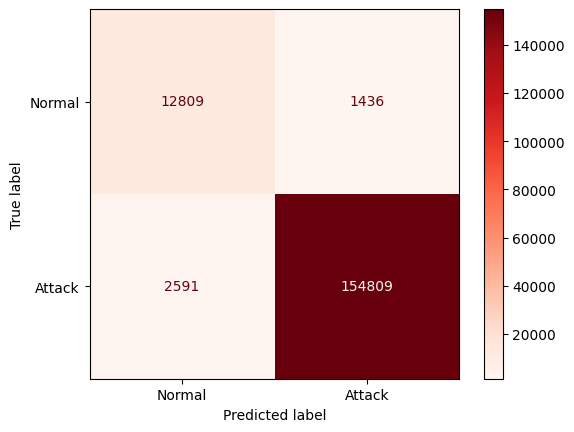

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     14245
           1       0.99      0.98      0.99    157400

    accuracy                           0.98    171645
   macro avg       0.91      0.94      0.93    171645
weighted avg       0.98      0.98      0.98    171645

ROC AUC Score: 0.9413657269788147
✅ Saved iso_model.pkl


In [ ]:
# ─── PART 1: Isolation Forest (Fixed) ────────────────────────────────────────────────

import joblib
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

iso_forest = IsolationForest(
    n_estimators=100, contamination=0.1, random_state=42
)

# 1) Fit on normal-only training data
iso_forest.fit(X_train)

# 2) Predict on test set
y_pred_iso = iso_forest.predict(X_test)
# Map  1 → normal (0),  -1 → anomaly (1)
y_pred_iso = np.where(y_pred_iso == 1, 0, 1)

# 3) Evaluation
print("Isolation Forest Results:")
cm = confusion_matrix(y_test, y_pred_iso)
ConfusionMatrixDisplay(cm, display_labels=["Normal","Attack"]).plot(cmap="Reds")
plt.show()

print(classification_report(y_test, y_pred_iso))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_iso))

# 4) Save the trained model
joblib.dump(iso_forest, "iso_model.pkl")
print("✅ Saved iso_model.pkl")


***PART 2: Autoencoder***

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
input_dim = X_train.shape[1]

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks for training
early_stop = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "best_autoencoder.h5", monitor="val_loss",
    save_best_only=True, verbose=1
)

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 118)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         7,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 118)            │         7,670 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,550 (80.27 KB)

 Trainable params: 20,550 (80.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,                 # increased epochs
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/50
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1155
Epoch 1: val_loss improved from inf to 0.00844, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1138 - val_loss: 0.0084
Epoch 2/50
195/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075
Epoch 2: val_loss improved from 0.00844 to 0.00354, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0074 - val_loss: 0.0035
Epoch 3/50
194/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029
Epoch 3: val_loss improved from 0.00354 to 0.00199, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 4/50
196/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 4: val_loss improved from 0.00199 to 0.00138, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/50
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013
Epoch 5: val_loss improved from 0.00138 to 0.00119, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 6: val_loss improved from 0.00119 to 0.00111, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
198/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 7: val_loss improved from 0.00111 to 0.00107, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
196/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010
Epoch 8: val_loss improved from 0.00107 to 0.00105, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/50
194/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010
Epoch 9: val_loss improved from 0.00105 to 0.00103, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/50
194/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010
Epoch 10: val_loss improved from 0.00103 to 0.00103, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 11/50
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7096e-04
Epoch 11: val_loss improved from 0.00103 to 0.00101, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.7144e-04 - val_loss: 0.0010
Epoch 12/50
191/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9598e-04
Epoch 12: val_loss improved from 0.00101 to 0.00099, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9473e-04 - val_loss: 9.9392e-04
Epoch 13/50
199/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4736e-04
Epoch 13: val_loss improved from 0.00099 to 0.00098, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.4758e-04 - val_loss: 9.7679e-04
Epoch 14/50
195/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5859e-04
Epoch 14: val_loss improved from 0.00098 to 0.00095, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.5812e-04 - val_loss: 9.4973e-04
Epoch 15/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2504e-04
Epoch 15: val_loss improved from 0.00095 to 0.00092, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2498e-04 - val_loss: 9.2288e-04
Epoch 16/50
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0445e-04
Epoch 16: val_loss improved from 0.00092 to 0.00092, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0440e-04 - val_loss: 9.2179e-04
Epoch 17/50
193/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0504e-04
Epoch 17: val_loss improved from 0.00092 to 0.00091, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0447e-04 - val_loss: 9.1086e-04
Epoch 18/50
199/201 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5636e-04
Epoch 18: val_loss improved from 0.00091 to 0.00090, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.5679e-04 - val_loss: 9.0466e-04
Epoch 19/50
196/201 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.8585e-04
Epoch 19: val_loss did not improve from 0.00090
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 8.8572e-04 - val_loss: 9.1052e-04
Epoch 20/50
194/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9618e-04
Epoch 20: val_loss improved from 0.00090 to 0.00090, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.9547e-04 - val_loss: 9.0340e-04
Epoch 21/50
190/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8566e-04
Epoch 21: val_loss improved from 0.00090 to 0.00089, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.8506e-04 - val_loss: 8.9284e-04
Epoch 22/50
194/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8010e-04
Epoch 22: val_loss did not improve from 0.00089
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7988e-04 - val_loss: 8.9597e-04
Epoch 23/50
196/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8316e-04
Epoch 23: val_loss improved from 0.00089 to 0.00089, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.8278e-04 - val_loss: 8.8710e-04
Epoch 24/50
192/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6516e-04
Epoch 24: val_loss improved from 0.00089 to 0.00089, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.6519e-04 - val_loss: 8.8541e-04
Epoch 25/50
193/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8098e-04
Epoch 25: val_loss did not improve from 0.00089
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.8026e-04 - val_loss: 8.8589e-04
Epoch 26/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4272e-04
Epoch 26: val_loss improved from 0.00089 to 0.00088, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.4282e-04 - val_loss: 8.8090e-04
Epoch 27/50
191/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5464e-04
Epoch 27: val_loss did not improve from 0.00088
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.5500e-04 - val_loss: 8.8457e-04
Epoch 28/50
192/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6784e-04
Epoch 28: val_loss improved from 0.00088 to 0.00088, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.6740e-04 - val_loss: 8.7859e-04
Epoch 29/50
193/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7197e-04
Epoch 29: val_loss improved from 0.00088 to 0.00088, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.7142e-04 - val_loss: 8.7847e-04
Epoch 30/50
198/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5466e-04
Epoch 30: val_loss improved from 0.00088 to 0.00088, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.5469e-04 - val_loss: 8.7767e-04
Epoch 31/50
199/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5999e-04
Epoch 31: val_loss improved from 0.00088 to 0.00088, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.5993e-04 - val_loss: 8.7541e-04
Epoch 32/50
191/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6012e-04
Epoch 32: val_loss did not improve from 0.00088
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.5973e-04 - val_loss: 8.7729e-04
Epoch 33/50
199/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6092e-04
Epoch 33: val_loss improved from 0.00088 to 0.00087, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.6086e-04 - val_loss: 8.6857e-04
Epoch 34/50
198/201 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5635e-04
Epoch 34: val_loss improved from 0.00087 to 0.00087, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 8.5626e-04 - val_loss: 8.6759e-04
Epoch 35/50
193/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7282e-04
Epoch 35: val_loss did not improve from 0.00087
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.7189e-04 - val_loss: 8.6875e-04
Epoch 36/50
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3991e-04
Epoch 36: val_loss improved from 0.00087 to 0.00086, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4011e-04 - val_loss: 8.5934e-04
Epoch 37/50
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3283e-04
Epoch 37: val_loss did not improve from 0.00086
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.3295e-04 - val_loss: 8.6660e-04
Epoch 38/50
198/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1878e-04
Epoch 38: val_loss improved from 0.00086 to 0.00077, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.1823e-04 - val_loss: 7.7427e-04
Epoch 39/50
192/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4716e-04
Epoch 39: val_loss improved from 0.00077 to 0.00076, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.4787e-04 - val_loss: 7.6023e-04
Epoch 40/50
198/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5305e-04
Epoch 40: val_loss improved from 0.00076 to 0.00076, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.5313e-04 - val_loss: 7.5877e-04
Epoch 41/50
195/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4857e-04
Epoch 41: val_loss improved from 0.00076 to 0.00076, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.4871e-04 - val_loss: 7.5632e-04
Epoch 42/50
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3626e-04
Epoch 42: val_loss improved from 0.00076 to 0.00075, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.3666e-04 - val_loss: 7.5321e-04
Epoch 43/50
196/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5070e-04
Epoch 43: val_loss improved from 0.00075 to 0.00075, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.5065e-04 - val_loss: 7.5294e-04
Epoch 44/50
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7332e-04
Epoch 44: val_loss improved from 0.00075 to 0.00041, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.7058e-04 - val_loss: 4.1323e-04
Epoch 45/50
198/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7944e-04
Epoch 45: val_loss improved from 0.00041 to 0.00041, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.7964e-04 - val_loss: 4.0814e-04
Epoch 46/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8240e-04
Epoch 46: val_loss improved from 0.00041 to 0.00041, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8241e-04 - val_loss: 4.0678e-04
Epoch 47/50
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8311e-04
Epoch 47: val_loss did not improve from 0.00041
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8313e-04 - val_loss: 4.0932e-04
Epoch 48/50
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8809e-04
Epoch 48: val_loss improved from 0.00041 to 0.00041, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8799e-04 - val_loss: 4.0538e-04
Epoch 49/50
198/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7942e-04
Epoch 49: val_loss improved from 0.00041 to 0.00040, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.7949e-04 - val_loss: 4.0405e-04
Epoch 50/50
195/201 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6983e-04
Epoch 50: val_loss improved from 0.00040 to 0.00040, saving model to best_autoencoder.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.7026e-04 - val_loss: 4.0375e-04


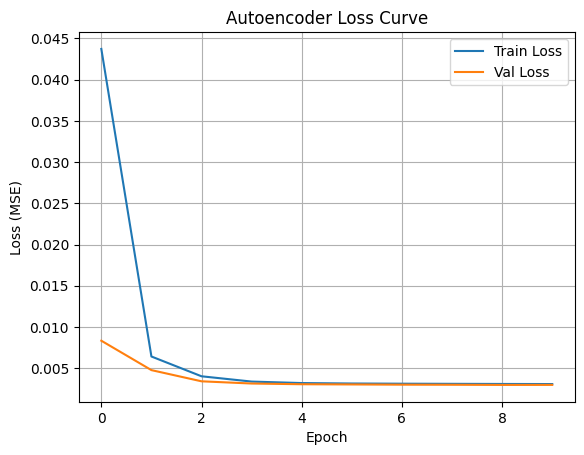

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Autoencoder Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

5364/5364 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step


In [ ]:
X_val_pred = autoencoder.predict(X_val)
mse_val = np.mean(np.power(X_val - X_val_pred, 2), axis=1)

threshold = np.percentile(mse_val, 95)  # You can try 90, 95, 99, etc.
print("Reconstruction error threshold:", threshold)

446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction error threshold: 0.013744687792642171


In [ ]:
y_pred_ae = [1 if e > threshold else 0 for e in mse]

Confusion Matrix:


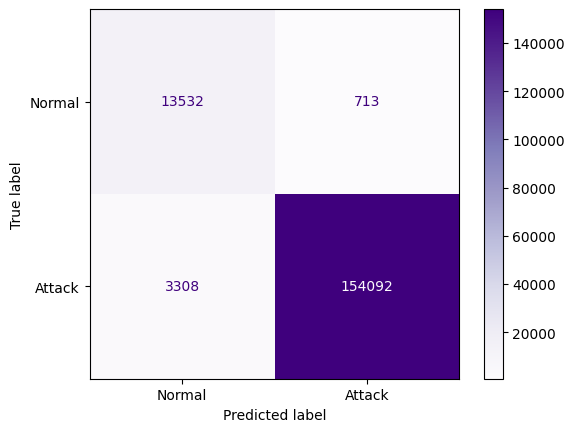


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     14245
           1       1.00      0.98      0.99    157400

    accuracy                           0.98    171645
   macro avg       0.90      0.96      0.93    171645
weighted avg       0.98      0.98      0.98    171645

ROC AUC Score: 0.9644654157614767


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_ae)
disp = ConfusionMatrixDisplay(cm, display_labels=["Normal", "Attack"])
disp.plot(cmap='Purples')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ae))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_ae))

 **Autoencoder Threshold Tuning**

In [ ]:
# 📊 Plot F1-score, Precision, Recall across different thresholds
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(min(mse), max(mse), 100)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    preds = [1 if e > t else 0 for e in mse]
    f1_scores.append(f1_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


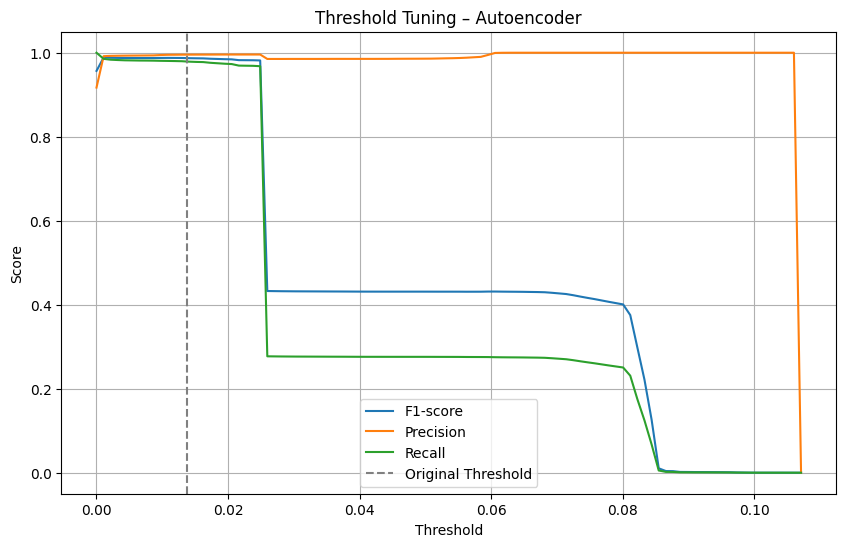

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(threshold, color='gray', linestyle='--', label='Original Threshold')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning – Autoencoder")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
print("🔍 Best Threshold (max F1):", best_threshold)


🔍 Best Threshold (max F1): 0.0010852279131059852


In [ ]:
y_pred_ae_best = [1 if e > best_threshold else 0 for e in mse]

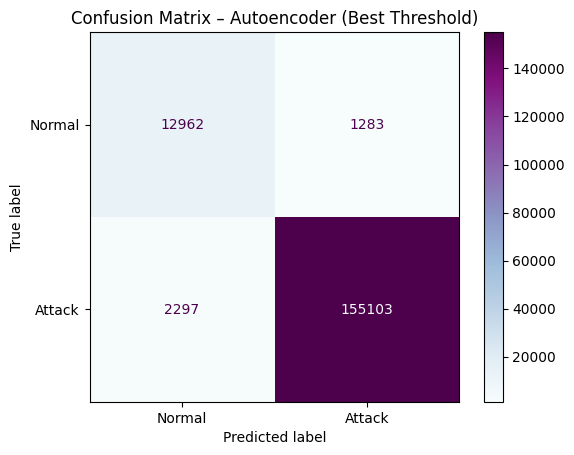


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     14245
           1       0.99      0.99      0.99    157400

    accuracy                           0.98    171645
   macro avg       0.92      0.95      0.93    171645
weighted avg       0.98      0.98      0.98    171645

ROC AUC Score: 0.9476699586515342


In [ ]:
cm = confusion_matrix(y_test, y_pred_ae_best)
disp = ConfusionMatrixDisplay(cm, display_labels=["Normal", "Attack"])
disp.plot(cmap='BuPu')
plt.title("Confusion Matrix – Autoencoder (Best Threshold)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ae_best))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_ae_best))


**Local Outlier Factor (LOF)**

---



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



🔍 Tuned LOF Results:


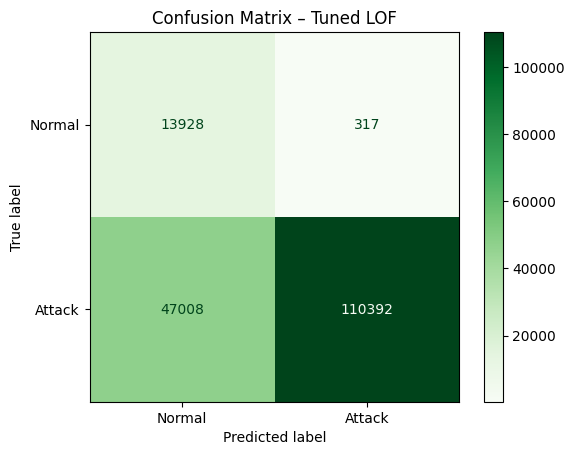

              precision    recall  f1-score   support

           0       0.23      0.98      0.37     14245
           1       1.00      0.70      0.82    157400

    accuracy                           0.72    171645
   macro avg       0.61      0.84      0.60    171645
weighted avg       0.93      0.72      0.79    171645

ROC AUC Score: 0.8395467323294514
✅ Saved lof_model.pkl


In [ ]:
# ─── PART X: Tuned LOF with Score Threshold & NaN Guard ─────────────────────────

import joblib
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# 1) Instantiate & fit on normal-only training data
lof = LocalOutlierFactor(
    n_neighbors=35,
    contamination=0.02,
    novelty=True
)
lof.fit(X_train)

# 2) Prepare train & test for scoring
X_train_lof = X_train.copy()[X_train.columns].fillna(0)
X_test_lof  = X_test.copy()[X_train.columns].fillna(0)

# 3) Compute raw anomaly scores (higher = more normal)
train_scores = lof.decision_function(X_train_lof)
lof_scores   = lof.decision_function(X_test_lof)

# 4) Pick cutoff at 2nd percentile of training scores
cutoff = np.percentile(train_scores, 2)

# 5) Predict anomalies: score < cutoff → anomaly (1), else normal (0)
y_pred_lof = np.where(lof_scores < cutoff, 1, 0)

# 6) Evaluate
print("🔍 Tuned LOF Results:")
cm_lof = confusion_matrix(y_test, y_pred_lof)
disp_lof = ConfusionMatrixDisplay(cm_lof, display_labels=["Normal","Attack"])
disp_lof.plot(cmap="Greens")
plt.title("Confusion Matrix – Tuned LOF")
plt.show()

print(classification_report(y_test, y_pred_lof))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lof))

# 7) Save the tuned LOF model
joblib.dump(lof, "lof_model.pkl")
print("✅ Saved lof_model.pkl")


**Hybrid Anomaly Detection Model (Autoencoder + Isolation Forest)**

In [ ]:
# Already done earlier, but just to be sure
y_pred_iso = [0 if p == 1 else 1 for p in iso_forest.predict(X_test)]

In [ ]:
# Convert lists to arrays
import numpy as np

ae = np.array(y_pred_ae_best)
iso = np.array(y_pred_iso)

# Union: if any model says anomaly → it's anomaly
hybrid_union = np.logical_or(ae, iso).astype(int)

# Intersection: both must say anomaly
hybrid_intersection = np.logical_and(ae, iso).astype(int)

🔁 Hybrid UNION (more sensitive):


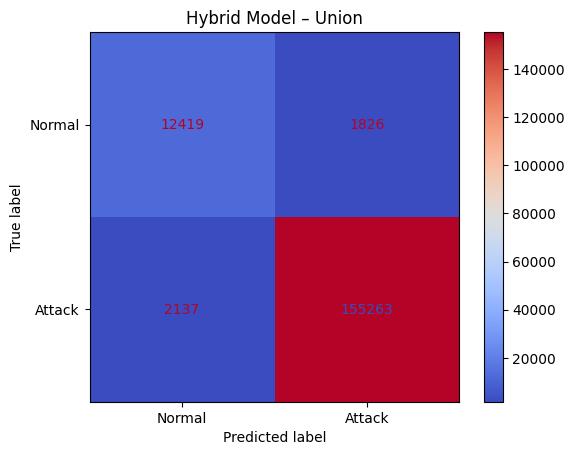

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     14245
           1       0.99      0.99      0.99    157400

    accuracy                           0.98    171645
   macro avg       0.92      0.93      0.92    171645
weighted avg       0.98      0.98      0.98    171645

ROC AUC: 0.9291188988044133


In [ ]:
print("🔁 Hybrid UNION (more sensitive):")
cm_union = confusion_matrix(y_test, hybrid_union)
disp_union = ConfusionMatrixDisplay(cm_union, display_labels=["Normal", "Attack"])
disp_union.plot(cmap='coolwarm')
plt.title("Hybrid Model – Union")
plt.show()

print(classification_report(y_test, hybrid_union))
print("ROC AUC:", roc_auc_score(y_test, hybrid_union))

🔁 Hybrid INTERSECTION (more precise):


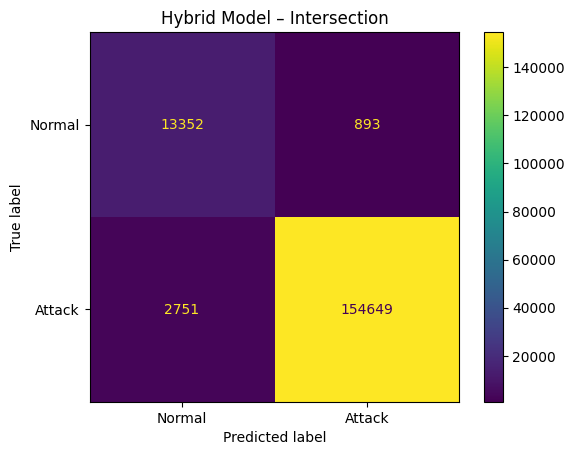

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     14245
           1       0.99      0.98      0.99    157400

    accuracy                           0.98    171645
   macro avg       0.91      0.96      0.93    171645
weighted avg       0.98      0.98      0.98    171645

ROC AUC: 0.9599167868259355


In [ ]:
print("🔁 Hybrid INTERSECTION (more precise):")
cm_inter = confusion_matrix(y_test, hybrid_intersection)
disp_inter = ConfusionMatrixDisplay(cm_inter, display_labels=["Normal", "Attack"])
disp_inter.plot(cmap='viridis')
plt.title("Hybrid Model – Intersection")
plt.show()

print(classification_report(y_test, hybrid_intersection))
print("ROC AUC:", roc_auc_score(y_test, hybrid_intersection))


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# 1) Aggregate mean absolute SHAP values per feature
shap_imp = pd.Series(
    np.abs(shap_vals_ice).mean(axis=0),
    index=X_ice.columns
).sort_values(ascending=False).head(10)

# 2) Turn into a DataFrame for Plotly
df_shap = shap_imp.reset_index()
df_shap.columns = ["feature","importance"]

# 3) Create a horizontal interactive bar chart
fig = px.bar(
    df_shap,
    x="importance",
    y="feature",
    orientation="h",
    title="🔑 SHAP Feature Importance – Isolation Forest",
    labels={"importance":"Mean |SHAP value|", "feature":""},
    hover_data={"importance":":.3f"},
)
fig.update_layout(
    yaxis=dict(categoryorder="total ascending"),
    margin=dict(l=120, r=30, t=60, b=30),
    plot_bgcolor="white"
)
fig.show()

# 4) Save the SHAP importances for your app
shap_imp.to_frame(name="importance") \
        .to_csv("iso_shap_importances.csv")
print("✅ Saved iso_shap_importances.csv")


✅ Saved iso_shap_importances.csv


### **Streamlit Web App for Real-Time Anomaly Detection**

---

